In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [4]:
df.shape



(72134, 4)

In [9]:
df['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

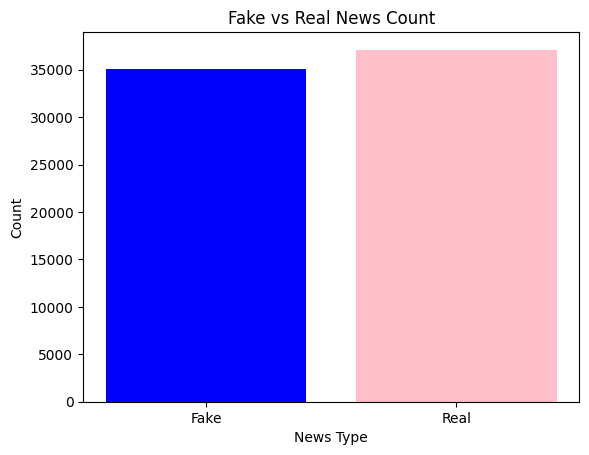

In [10]:
fake_count = df[df['label'] == 0].shape[0]
real_count = df[df['label'] == 1].shape[0]
labels = ['Fake', 'Real']
counts = [fake_count, real_count]

plt.bar(labels, counts, color=['blue', 'pink'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.title('Fake vs Real News Count')
plt.show()

In [11]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [12]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

<Axes: >

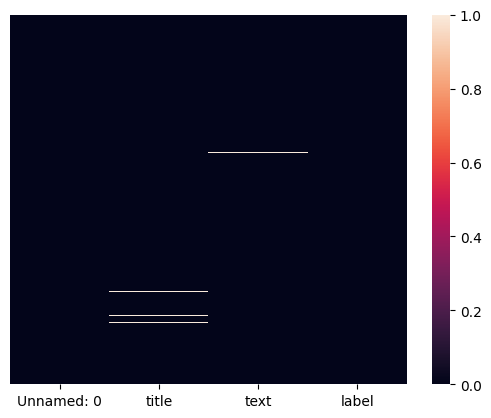

In [13]:
sns.heatmap(df.isnull(),yticklabels = False)

In [14]:
df=df.fillna(' ')

In [15]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [16]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [18]:
df["training_feature"] = df["title"] + df["text"]
df.head()

,title,text,label,training_feature
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [19]:
df=df[['training_feature','label']]
df

,training_feature,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
...,...,...
72129,Russians steal research on Trump in hack of U....,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,0


In [80]:
dfFake = df[df['label'] == 0]
dfFake

,training_feature,label,preprocessed_text
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0,bobbi jindal rais hindu use stori christian co...
11,"May Brexit offer would hurt, cost EU citizens ...",0,may brexit offer would hurt cost eu citizen eu...
12,Schumer calls on Trump to appoint official to ...,0,schumer call trump appoint offici overse puert...
14,No Change Expected for ESPN Political Agenda D...,0,chang expect espn polit agenda despit huge sub...
15,Billionaire Odebrecht in Brazil scandal releas...,0,billionair odebrecht brazil scandal releas hou...
...,...,...,...
72124,An Unlikely Contender Rises in France as the A...,0,unlik contend rise franc antithesi trump new y...
72126,Determined to kill: Can tough gun laws end mas...,0,determin kill tough gun law end mass shootings...
72129,Russians steal research on Trump in hack of U....,0,russian steal research trump hack us democrat ...
72131,Migrants Refuse To Leave Train At Refugee Camp...,0,migrant refus leav train refuge camp hungarymi...


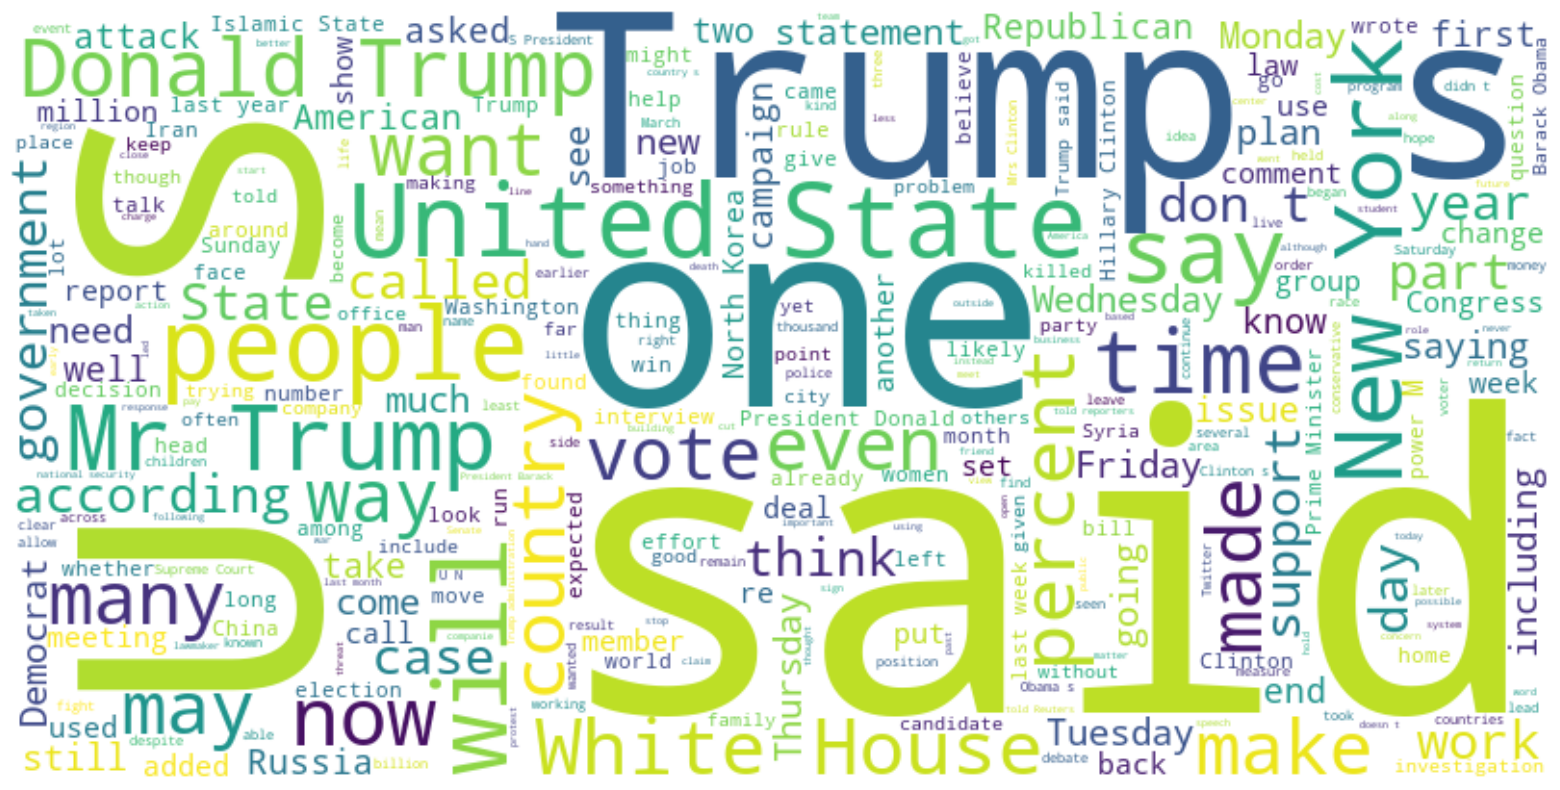

In [81]:

from wordcloud import WordCloud
FakeCon = ' '.join(con for con in dfFake['training_feature'])
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(FakeCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
dfTrue = df[df['label'] == 1]
dfTrue

,training_feature,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
4,SATAN 2: Russia unvelis an image of its terrif...,1
5,About Time! Christian Group Sues Amazon and SP...,1
...,...,...
72125,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,1
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,1
72128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,1
72130,WATCH: Giuliani Demands That Democrats Apolog...,1


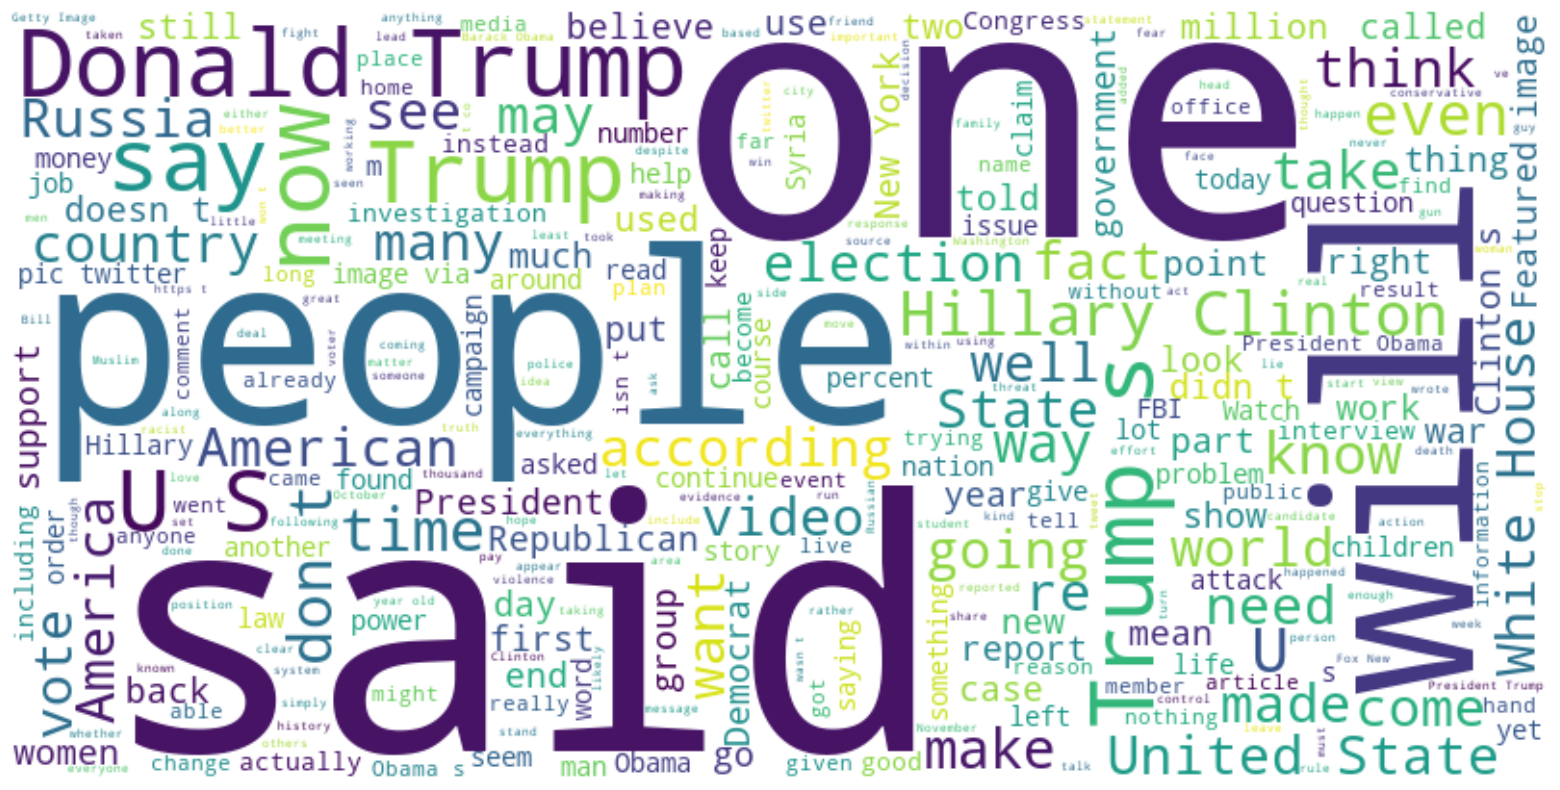

In [23]:
from wordcloud import WordCloud
FakeCon = ' '.join(con for con in dfTrue['training_feature'])
wordcloud = WordCloud(background_color='white', 
    max_words=300,
    width=800, 
    height=400,).generate(FakeCon)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download(['stopwords'])
nltk.download('punkt')

[nltk_data] <urlopen error [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
samplet = df['training_feature'].iloc[5]
print(samplet)
wordst = word_tokenize(samplet) 
wordst

About Time! Christian Group Sues Amazon and SPLC for Designation as Hate GroupAll we can say on this one is it s about time someone sued the Southern Poverty Law Center!On Tuesday, D. James Kennedy Ministries (DJKM) filed a lawsuit against the Southern Poverty Law Center (SPLC), the charity navigation organization GuideStar, and Amazon, for defamation, religious discrimination, and trafficking in falsehood. The SPLC listed DJKM as a  hate group,  while GuideStar also categorized it in those terms, and Amazon kept the ministry off of its charity donation program, Amazon Smile. We embarked today on a journey to right a terrible wrong,  Dr. Frank Wright, president and CEO at DJKM, said in a statement Tuesday.  Those who knowingly label Christian ministries as  hate  groups, solely for subscribing to the historic Christian faith, are either woefully uninformed or willfully deceitful. In the case of the Southern Poverty Law Center, our lawsuit alleges the latter. The SPLC has labeled DJKM a

['About',
 'Time',
 '!',
 'Christian',
 'Group',
 'Sues',
 'Amazon',
 'and',
 'SPLC',
 'for',
 'Designation',
 'as',
 'Hate',
 'GroupAll',
 'we',
 'can',
 'say',
 'on',
 'this',
 'one',
 'is',
 'it',
 's',
 'about',
 'time',
 'someone',
 'sued',
 'the',
 'Southern',
 'Poverty',
 'Law',
 'Center',
 '!',
 'On',
 'Tuesday',
 ',',
 'D.',
 'James',
 'Kennedy',
 'Ministries',
 '(',
 'DJKM',
 ')',
 'filed',
 'a',
 'lawsuit',
 'against',
 'the',
 'Southern',
 'Poverty',
 'Law',
 'Center',
 '(',
 'SPLC',
 ')',
 ',',
 'the',
 'charity',
 'navigation',
 'organization',
 'GuideStar',
 ',',
 'and',
 'Amazon',
 ',',
 'for',
 'defamation',
 ',',
 'religious',
 'discrimination',
 ',',
 'and',
 'trafficking',
 'in',
 'falsehood',
 '.',
 'The',
 'SPLC',
 'listed',
 'DJKM',
 'as',
 'a',
 'hate',
 'group',
 ',',
 'while',
 'GuideStar',
 'also',
 'categorized',
 'it',
 'in',
 'those',
 'terms',
 ',',
 'and',
 'Amazon',
 'kept',
 'the',
 'ministry',
 'off',
 'of',
 'its',
 'charity',
 'donation',
 'program'

In [26]:
print("Before stopwords:",wordst)
stop_words = set(stopwords.words('english'))
print(stop_words)
wordss = [word for word in wordst if word not in stop_words]
print("after stopwords",wordss)

Before stopwords: ['About', 'Time', '!', 'Christian', 'Group', 'Sues', 'Amazon', 'and', 'SPLC', 'for', 'Designation', 'as', 'Hate', 'GroupAll', 'we', 'can', 'say', 'on', 'this', 'one', 'is', 'it', 's', 'about', 'time', 'someone', 'sued', 'the', 'Southern', 'Poverty', 'Law', 'Center', '!', 'On', 'Tuesday', ',', 'D.', 'James', 'Kennedy', 'Ministries', '(', 'DJKM', ')', 'filed', 'a', 'lawsuit', 'against', 'the', 'Southern', 'Poverty', 'Law', 'Center', '(', 'SPLC', ')', ',', 'the', 'charity', 'navigation', 'organization', 'GuideStar', ',', 'and', 'Amazon', ',', 'for', 'defamation', ',', 'religious', 'discrimination', ',', 'and', 'trafficking', 'in', 'falsehood', '.', 'The', 'SPLC', 'listed', 'DJKM', 'as', 'a', 'hate', 'group', ',', 'while', 'GuideStar', 'also', 'categorized', 'it', 'in', 'those', 'terms', ',', 'and', 'Amazon', 'kept', 'the', 'ministry', 'off', 'of', 'its', 'charity', 'donation', 'program', ',', 'Amazon', 'Smile', '.', 'We', 'embarked', 'today', 'on', 'a', 'journey', 'to', 

In [27]:
print("before stemming:",wordss)
stemmer = PorterStemmer()
print(stemmer)
wordsst = [stemmer.stem(word) for word in wordss]
print("after stemming",wordsst)

before stemming: ['About', 'Time', '!', 'Christian', 'Group', 'Sues', 'Amazon', 'SPLC', 'Designation', 'Hate', 'GroupAll', 'say', 'one', 'time', 'someone', 'sued', 'Southern', 'Poverty', 'Law', 'Center', '!', 'On', 'Tuesday', ',', 'D.', 'James', 'Kennedy', 'Ministries', '(', 'DJKM', ')', 'filed', 'lawsuit', 'Southern', 'Poverty', 'Law', 'Center', '(', 'SPLC', ')', ',', 'charity', 'navigation', 'organization', 'GuideStar', ',', 'Amazon', ',', 'defamation', ',', 'religious', 'discrimination', ',', 'trafficking', 'falsehood', '.', 'The', 'SPLC', 'listed', 'DJKM', 'hate', 'group', ',', 'GuideStar', 'also', 'categorized', 'terms', ',', 'Amazon', 'kept', 'ministry', 'charity', 'donation', 'program', ',', 'Amazon', 'Smile', '.', 'We', 'embarked', 'today', 'journey', 'right', 'terrible', 'wrong', ',', 'Dr.', 'Frank', 'Wright', ',', 'president', 'CEO', 'DJKM', ',', 'said', 'statement', 'Tuesday', '.', 'Those', 'knowingly', 'label', 'Christian', 'ministries', 'hate', 'groups', ',', 'solely', 'su

In [28]:
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.lower()
    
    # Tokenization
    words = word_tokenize(text)   
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stemming (you can use lemmatization instead if preferred)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Join the words back into a string 
    preprocessed_text = ' '.join(words)
    return preprocessed_text
df['preprocessed_text'] = df['training_feature'].apply(preprocess_text)   



In [29]:
df 

,training_feature,label,preprocessed_text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1,law enforc high alert follow threat cop white ...
1,Did they post their votes for Hillary already?,1,post vote hillari alreadi
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1,unbeliev obama attorney gener say charlott rio...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0,bobbi jindal rais hindu use stori christian co...
4,SATAN 2: Russia unvelis an image of its terrif...,1,satan russia unv imag terrifi new supernuk wes...
...,...,...,...
72129,Russians steal research on Trump in hack of U....,0,russian steal research trump hack us democrat ...
72130,WATCH: Giuliani Demands That Democrats Apolog...,1,watch giuliani demand democrat apolog trump ra...
72131,Migrants Refuse To Leave Train At Refugee Camp...,0,migrant refus leav train refuge camp hungarymi...
72132,Trump tussle gives unpopular Mexican leader mu...,0,trump tussl give unpopular mexican leader much...


In [30]:
x = df['preprocessed_text'].values
y = df['label']   

In [31]:
vectorizern= TfidfVectorizer(ngram_range=(2,3),max_features=1500)
Xx=vectorizern.fit_transform(x)     


In [32]:
feautrenames=vectorizern.get_feature_names_out() 
print(feautrenames) 

['abc news' 'access pipelin' 'accord new' ... 'young peopl' 'your go'
 'youv got']


In [33]:
vectorizer= TfidfVectorizer()
X=vectorizer.fit_transform(x)


In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, stratify=y, random_state=42)

In [35]:
print(len(x_test),len(x_train),len(y_train),len(y_test))

10821 61313 61313 10821


In [36]:
print(x_train)

['donald trump suggest second amend peopl could act hillari clinton new york timeswilmington n c donald j trump tuesday appear rais possibl gun right support could take matter hand hillari clinton elect presid appoint judg favor stricter gun control measur repeat content mr clinton want abolish right bear arm mr trump warn ralli would horribl day mr clinton elect got appoint tiebreak suprem court justic get pick judg noth folk mr trump said crowd began boo quickli ad although second amend peopl mayb dont know obliqu mr trump remark quickli elicit wave condemn democrat gun control advoc other accus suggest violenc mr clinton liber jurist bernic king daughter rev dr martin luther king jr call mr trump word distast disturb danger mr clinton run mate senat tim kain virginia express disbelief nobodi seek leadership posit especi presid leadership countri anyth counten violenc that say mr kain said austin tex call mr trump remark window soul person temperament suit task dan gross presid bradi

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_train = tfidf_vectorizer.fit_transform(x_train)
x_test = tfidf_vectorizer.transform(x_test)

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train) 

LogisticRegression(max_iter=500)

In [109]:
ypred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ypred,y_test)
print(cm)

[[4912  307]
 [ 343 5259]]


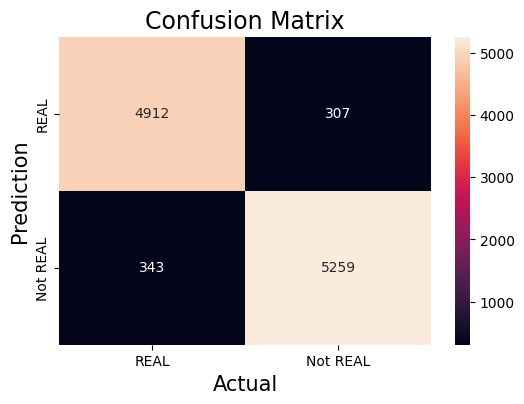

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
k =50
kf = StratifiedKFold(n_splits=k)   
mod = cross_val_score(model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.max(mod)*100)  
p= cross_val_score(model,X, y, scoring='precision',cv=kf)
print("precision:",np.max(p)*100)
f1 = cross_val_score(model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.max(f1)*100)
re= cross_val_score(model,X, y, scoring='recall',cv=kf)
print("Recall:",np.max(re)*100)

accuracy: 96.11650485436894
precision: 95.97855227882037
f1_score: 96.23655913978496
Recall: 97.30458221024259


In [89]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.9387718671902892
0.9411764705882353


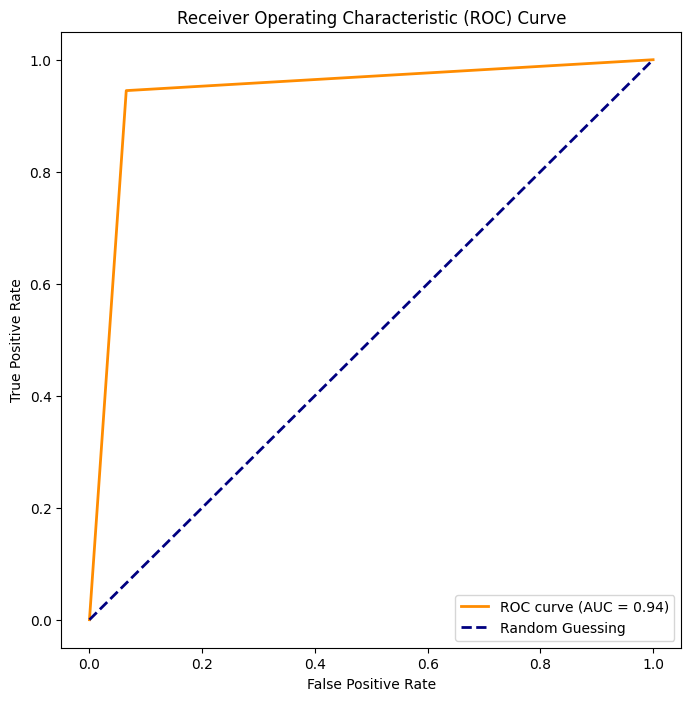

In [113]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()    

RandomForest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=70)
rf_model.fit(x_train, y_train)  

RandomForestClassifier(max_depth=70, random_state=42)

In [105]:
ypred=rf_model.predict(x_test) 
cm = confusion_matrix(ypred,y_test)
print(cm)

[[4878  209]
 [ 377 5357]]


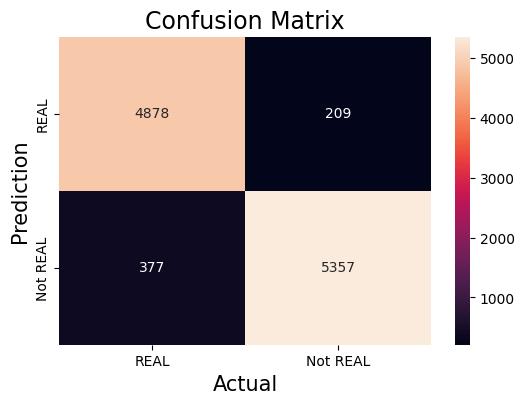

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show() 

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
k =15
kf = StratifiedKFold(n_splits=k)   
mod = cross_val_score(rf_model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.max(mod)*100)  
p= cross_val_score(rf_model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(rf_model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(rf_model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 0.945846040107199
precision: 0.9342518311824206
f1-score 0.948141592920354
recall 0.9624505928853755


In [91]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.9342518311824206
0.9589148810693926


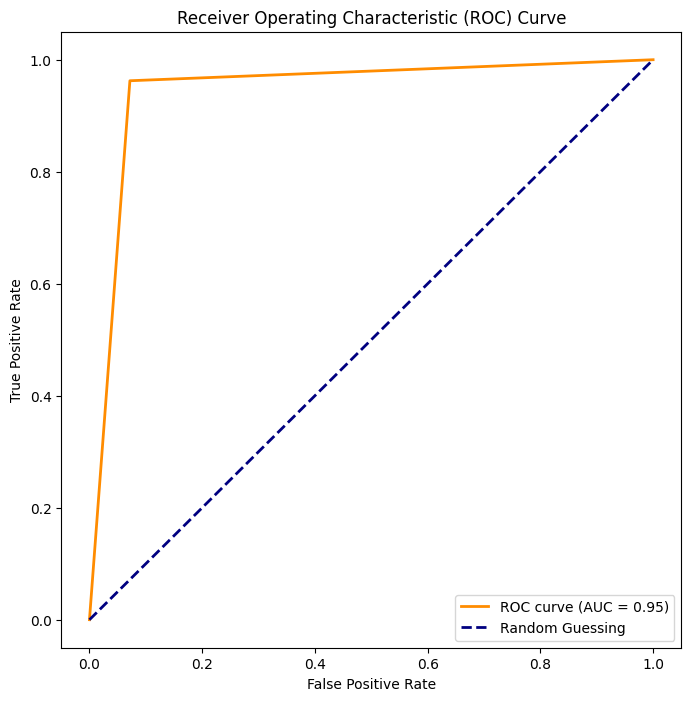

In [108]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGB Classifier

In [102]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.2, n_estimators=50,  eval_metric="logloss", random_state=42,max_depth=10)
xgb_model.fit(x_train, y_train)                  

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [103]:
ypred=xgb_model.predict(x_test)
cm = confusion_matrix(ypred,y_test)
print(cm)

[[4935  154]
 [ 320 5412]]


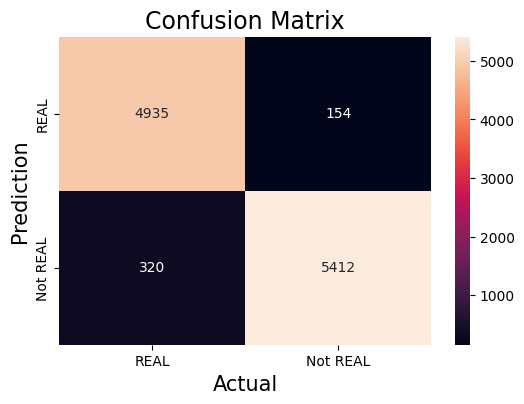

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =10
kf = KFold(n_splits=k)
mod = cross_val_score(xgb_model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(xgb_model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(xgb_model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(xgb_model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 0.9561962850013862
precision: 0.9441730635031402
f1-score 0.9580456718003186
recall 0.9723320158102767


In [93]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.9441730635031402
0.9697386519944979


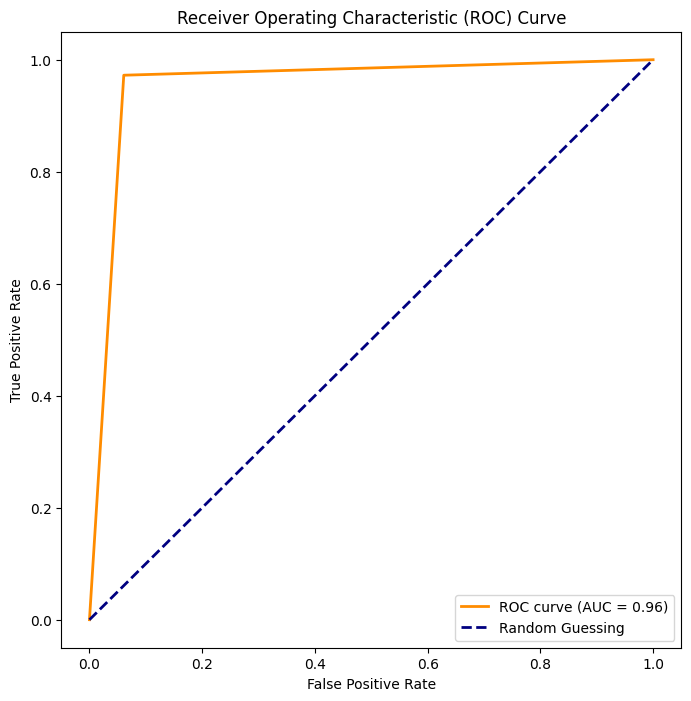

In [104]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()   

MLP Classifier

In [51]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1)
mlp_model.fit(x_train, y_train)  

MLPClassifier(early_stopping=True, max_iter=500, random_state=42)

In [100]:
ypred = mlp_model.predict(x_test)
cm = confusion_matrix(ypred,y_test)
cm

array([[4930,  299],
       [ 325, 5267]], dtype=int64)

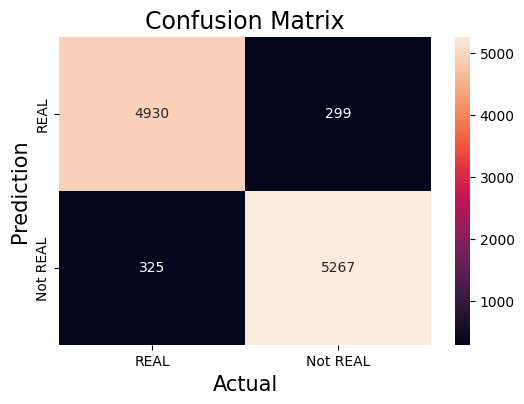

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show()   

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =10
kf = KFold(n_splits=k)
mod = cross_val_score(mlp_model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(mlp_model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(mlp_model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(mlp_model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)    

accuracy: 0.9423343498752426
precision: 0.9418812589413448
f1-score 0.9440759992830258
recall 0.9462809917355371


In [95]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity)
print(specificity)

0.9418812589413448
0.9428188946261236


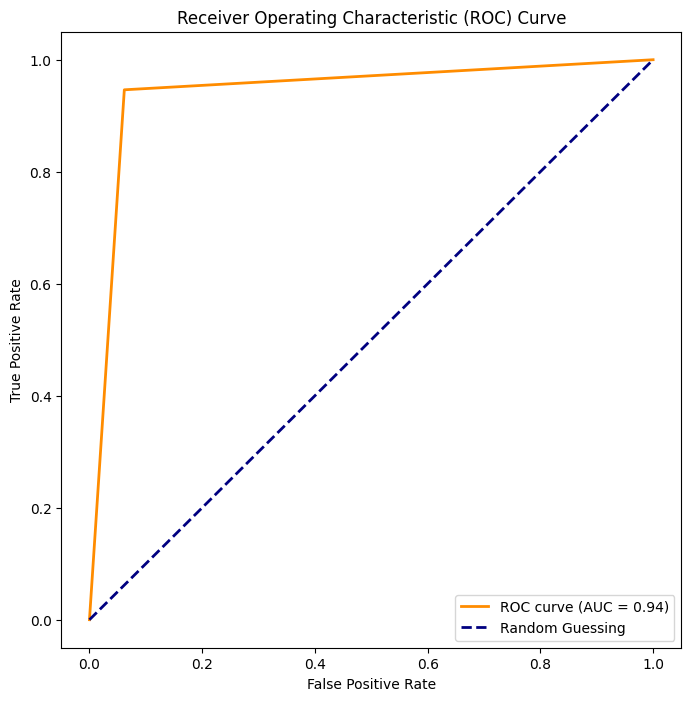

In [101]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

BernouliNB

In [96]:
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
ypred = bnb_model.predict(x_test)

In [97]:
cm = confusion_matrix(ypred,y_test)
cm

array([[3655,  856],
       [1600, 4710]], dtype=int64)

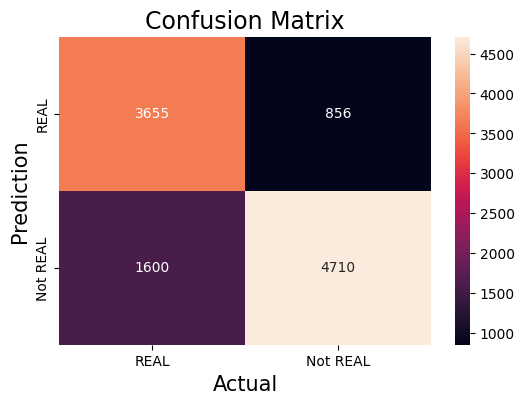

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['REAL','Not REAL'],
yticklabels=['REAL','Not REAL'])
plt.ylabel('Prediction',fontsize=15)
plt.xlabel('Actual',fontsize=15)
plt.title('Confusion Matrix',fontsize=17)
plt.show()    

In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k =10
kf = KFold(n_splits=k)
mod = cross_val_score(bnb_model,X, y, scoring='accuracy', cv=kf)
print("accuracy:",np.mean(mod)*100)
p= cross_val_score(bnb_model,X, y, scoring='precision',cv=kf)
print("precision:",np.mean(p)*100)
f1 = cross_val_score(bnb_model,X, y, scoring='f1',cv=kf)
print("f1_score:",np.mean(f1)*100)
re= cross_val_score(bnb_model,X, y, scoring='recall',cv=kf)
print("Recall:",np.mean(re)*100)

accuracy: 86.11750047305078
precision: 84.38781411958357
f1_score: 86.9101499386056
Recall: 89.59196130040873


In [98]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(sensitivity) 
print(specificity)

0.7464342313787639
0.81024163156728


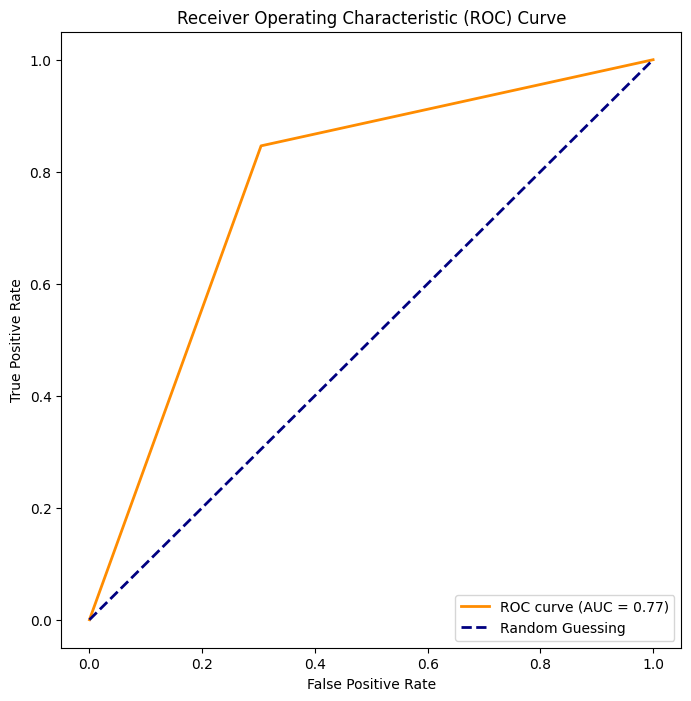

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_5716\1641783904.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(index[i] - 0.05, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=8)
C:\Users\madhu\AppData\Local\Temp\ipykernel_5716\1641783904.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(index[i] + bar_width - 0.05, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=8)


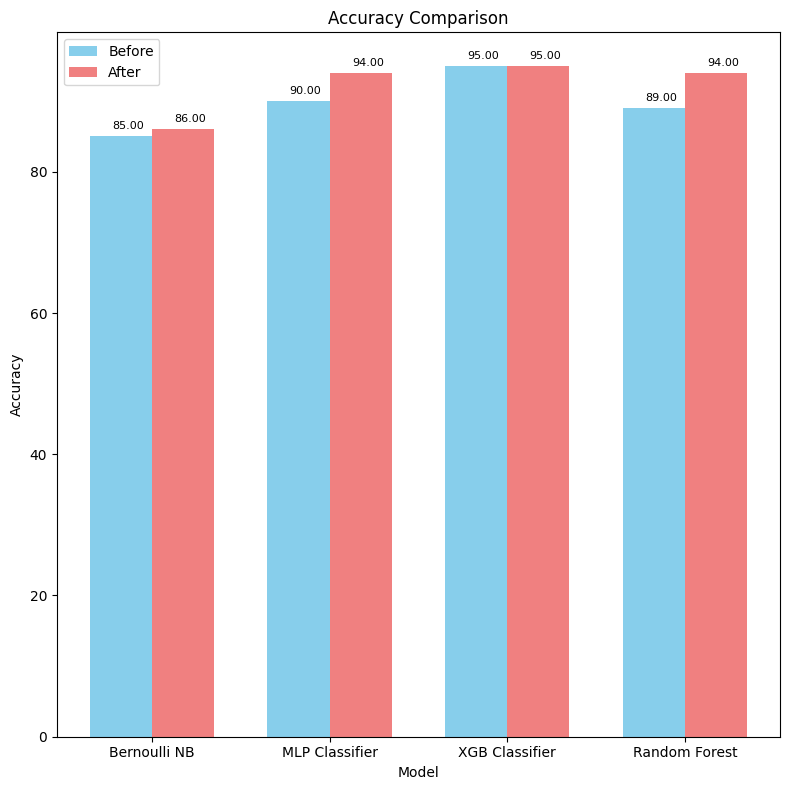

In [7]:
data_before = {

    'Model': ['Bernoulli NB','MLP Classifier','XGB Classifier','Random Forest'],
    'Accuracy': [85,90,95,89,],
}

data_after = {
    'Model': ['Bernoulli NB','MLP Classifier','XGB Classifier','Random Forest'],
    'Accuracy': [86,94,95,94],
}

# Create dataframes
dtfm_before = pd.DataFrame(data_before)
dtfm_after = pd.DataFrame(data_after)

# Set the Model column as the index for better plotting
dtfm_before.set_index('Model', inplace=True)
dtfm_after.set_index('Model', inplace=True)

# Create a bar graph
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
def plot_bargraph(ax, metric, title):
    before_values = dtfm_before[metric]
    after_values = dtfm_after[metric]
    models = dtfm_before.index

    index = np.arange(len(models))
    bar_width = 0.35

    ax.bar(index, before_values, width=bar_width, label='Before', color='skyblue')
    ax.bar(index + bar_width, after_values, width=bar_width, label='After', color='lightcoral')

    for i in range(len(models)):
        ax.text(index[i] - 0.05, before_values[i] + 1, f'{before_values[i]:.2f}', fontsize=8)
        ax.text(index[i] + bar_width - 0.05, after_values[i] + 1, f'{after_values[i]:.2f}', fontsize=8)

    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

plot_bargraph(axes, 'Accuracy', 'Accuracy Comparison')
plt.tight_layout()
plt.show()

         Model  Accuracy
0           LR        96
1           RF        94
2  BERNOULI NB        86
3          MLP        94
4          XGB        95


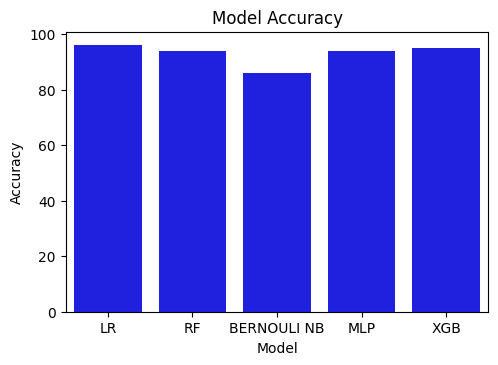

In [8]:
import pandas as pd
data = {
    #'Model': ['LOGISTIC REGRESSIN', 'RANDOM FOREST','BernoulliNB,'MPL Classifier','XGB Classifier'],
    'Model':['LR','RF','BERNOULI NB','MLP','XGB'],
    'Accuracy': [96,94,86,94,95],

}
dtfm= pd.DataFrame(data)
print(dtfm)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2,1)
sns.barplot(x=dtfm['Model'], y=dtfm['Accuracy'], color='blue')
plt.title('Model Accuracy')
plt.show()  

In [79]:
import pickle
pickle.dump(tfidf_vectorizer, open('vectorizers.pkl', 'wb'))

In [78]:
filename = 'MY_MODEL.pkl'
pickle.dump(model, open(filename, 'wb')) 

In [122]:
from sklearn.ensemble import VotingClassifier
# Initialize the Voting Classifier
# You can adjust the weights and include more models if needed
voting_classifier = VotingClassifier(estimators=[('rf', rf_model),('log',model),('bnb',bnb_model),('mlp',mlp_model)], voting='soft')

In [123]:
# Train the ensemble model
voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=70,
                                                     random_state=42)),
                             ('log', LogisticRegression(max_iter=500)),
                             ('bnb', BernoulliNB()),
                             ('mlp',
                              MLPClassifier(early_stopping=True, max_iter=500,
                                            random_state=42))],
                 voting='soft')

In [124]:
# Make predictions
y_pred = voting_classifier.predict(x_test) 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)

Accuracy: 0.9450143239996304
